In [1]:
import re
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
df = pd.read_csv('BaseRotulada.csv', index_col=0)
df.head()

,text,sentimento
0,Como instalar o Windows 11 mesmo sem TPM 2.0 n...,Neutro
1,🚨 VALE A ATENÇÃO:\n\nUma atualização falsa par...,Negativo
2,Windows 11 está uma merda,Negativo
3,depois que atualizei pro windows 11 nunca mais...,Negativo
4,👍👍👍\n\nÓtimo preço parcelado! Com Ryzen 7!\n\n...,Neutro


## Funções de Pre-processamento de dados

In [3]:
stopwords = nltk.corpus.stopwords.words('portuguese')

def emoji(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' emoji_positivo ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' emoji_positivo ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' emoji_positivo ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' emoji_positivo ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' emoji_negativo ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' emoji_negativo ', tweet)
    return tweet

def processar_tweet(tweet):
    tweet = re.sub('[wW]indows 11', 'windows11', tweet)                  
    tweet = re.sub('[wW]indows 10', 'windows10', tweet)
    tweet = tweet.lower()                                             # Lowercases the string
    tweet = re.sub('@[^\s]+', '', tweet)                              # Removes usernames
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)   # Remove URLs
    #tweet = re.sub(r"\d+", " ", str(tweet))                           # Removes all digits
    tweet = re.sub('&quot;'," ", tweet)                               # Remove (&quot;) 
    tweet = emoji(tweet)                                              # Replaces Emojis
    tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))                   # Removes all single characters
    tweet = re.sub(r"[^\w\s]", " ", str(tweet))                       # Removes all punctuations
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)                         # Convert more than 2 letter repetitions to 2 letter
    tweet = re.sub(r"\s+", " ", str(tweet))                           # Replaces double spaces with single space    
    return tweet

def tokenizar_tweet(txt):
    tokens = re.split('\W+', txt)
    return tokens

def remover_stopwords(txt_tokenizado):
    txt_clean = [word for word in txt_tokenizado if word not in stopwords]
    return txt_clean
    

In [4]:
df['texto_processado'] = np.vectorize(processar_tweet)(df['text'])
df

,text,sentimento,texto_processado
0,Como instalar o Windows 11 mesmo sem TPM 2.0 n...,Neutro,como instalar windows11 mesmo sem tpm 2 0 no p...
1,🚨 VALE A ATENÇÃO:\n\nUma atualização falsa par...,Negativo,vale atenção uma atualização falsa para windo...
2,Windows 11 está uma merda,Negativo,windows11 está uma merda
3,depois que atualizei pro windows 11 nunca mais...,Negativo,depois que atualizei pro windows11 nunca mais ...
4,👍👍👍\n\nÓtimo preço parcelado! Com Ryzen 7!\n\n...,Neutro,ótimo preço parcelado com ryzen 7 notebook le...
...,...,...,...
3923,Como é gosto pegar uma maquina pra formatar de...,Neutro,como é gosto pegar uma maquina pra formatar de...
3924,🌐 Android 13 transmitirá aplicativos do celula...,Neutro,android 13 transmitirá aplicativos do celular...
3925,Pensando em migrar minha instalação atual do A...,Neutro,pensando em migrar minha instalação atual do a...
3926,Proteja seu computador com o Fort Firewall #fi...,Neutro,proteja seu computador com fort firewall firew...


In [5]:
df['texto_processado_tokenizado'] = df['texto_processado'].apply(lambda x: tokenizar_tweet(x))
df.head()

,text,sentimento,texto_processado,texto_processado_tokenizado
0,Como instalar o Windows 11 mesmo sem TPM 2.0 n...,Neutro,como instalar windows11 mesmo sem tpm 2 0 no p...,"[como, instalar, windows11, mesmo, sem, tpm, 2..."
1,🚨 VALE A ATENÇÃO:\n\nUma atualização falsa par...,Negativo,vale atenção uma atualização falsa para windo...,"[, vale, atenção, uma, atualização, falsa, par..."
2,Windows 11 está uma merda,Negativo,windows11 está uma merda,"[windows11, está, uma, merda]"
3,depois que atualizei pro windows 11 nunca mais...,Negativo,depois que atualizei pro windows11 nunca mais ...,"[depois, que, atualizei, pro, windows11, nunca..."
4,👍👍👍\n\nÓtimo preço parcelado! Com Ryzen 7!\n\n...,Neutro,ótimo preço parcelado com ryzen 7 notebook le...,"[, ótimo, preço, parcelado, com, ryzen, 7, not..."


In [6]:
df['texto_sem_stopwords'] = df['texto_processado_tokenizado'].apply(lambda x: remover_stopwords(x))
df.head()

,text,sentimento,texto_processado,texto_processado_tokenizado,texto_sem_stopwords
0,Como instalar o Windows 11 mesmo sem TPM 2.0 n...,Neutro,como instalar windows11 mesmo sem tpm 2 0 no p...,"[como, instalar, windows11, mesmo, sem, tpm, 2...","[instalar, windows11, tpm, 2, 0, pc, valeapena..."
1,🚨 VALE A ATENÇÃO:\n\nUma atualização falsa par...,Negativo,vale atenção uma atualização falsa para windo...,"[, vale, atenção, uma, atualização, falsa, par...","[, vale, atenção, atualização, falsa, windows1..."
2,Windows 11 está uma merda,Negativo,windows11 está uma merda,"[windows11, está, uma, merda]","[windows11, merda]"
3,depois que atualizei pro windows 11 nunca mais...,Negativo,depois que atualizei pro windows11 nunca mais ...,"[depois, que, atualizei, pro, windows11, nunca...","[atualizei, pro, windows11, nunca, paz]"
4,👍👍👍\n\nÓtimo preço parcelado! Com Ryzen 7!\n\n...,Neutro,ótimo preço parcelado com ryzen 7 notebook le...,"[, ótimo, preço, parcelado, com, ryzen, 7, not...","[, ótimo, preço, parcelado, ryzen, 7, notebook..."


In [7]:
df.to_csv('DadoModelo.csv')
df.to_excel('DadoModelo_editado.xlsx')

# Wordcloud

## Wordcloud Geral 

In [20]:
def freq(str):
    # correção de termos
    # atualização
    #padrao = r'(atualiz)([^\s].*?)( |$)'
    #str = re.sub(padrao, 'atualização', str)
    
    str = re.split("[,\.|-]|[ ]",str)
    str2 = []
    
    for i in str:
        if i not in str2:
            str2.append(i)
    
    termos = []
    cont_termos = []
    for i in range(0, len(str2)):
        termos.append(str2[i])
        cont_termos.append(str.count(str2[i]))
    
    freq_termos_df_inicial = {'Termos': termos,
                      'Quantidade': cont_termos
                     }
    freq_termos_df = pd.DataFrame(freq_termos_df_inicial, columns = ['Termos', 'Quantidade'])
    freq_termos_df.to_excel('Termos.xlsx')

In [ ]:
freq()

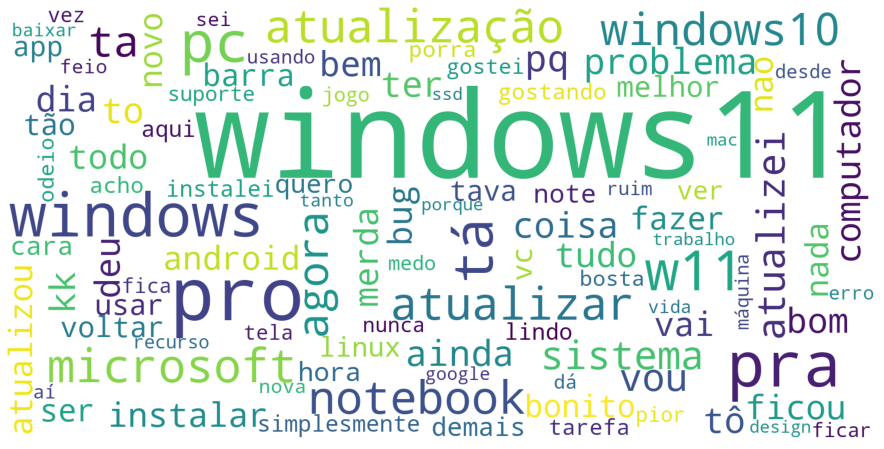

In [21]:
df_sem_neutro = df.loc[df['sentimento']!='Neutro']
texto_geral = df_sem_neutro['texto_sem_stopwords'].tolist()

#texto_geral = df['texto_sem_stopwords'].tolist()

in_del, out_del = ",", " "
texto_base_WordCloud = out_del.join([in_del.join([str(ele) for ele in sub]) for sub in texto_geral])

freq(texto_base_WordCloud)

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='white',
                      width=1600,
                      height=800,
                      max_words=100,
                      colormap='viridis',
                      collocations=False,
                      #mask=mask,
                      #contour_color='#023075',
                      #contour_width=3,
                     ).generate(texto_base_WordCloud)

fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file('nuvem.png')

In [12]:
texto_base_WordCloud.to_csv('texto_base_WordCloud.csv')

AttributeError: 'str' object has no attribute 'to_csv'

In [26]:
df['sentimento']!='Neutro'

0       False
1        True
2        True
3        True
4       False
        ...  
3923    False
3924    False
3925    False
3926    False
3927    False
Name: sentimento, Length: 3928, dtype: bool

In [10]:
df_neg = df.loc[df['sentimento']=='Negativo']
texto_neg = df_neg['texto_processado']
texto_neg

1        vale atenção uma atualização falsa para windo...
2                                windows11 está uma merda
3       depois que atualizei pro windows11 nunca mais ...
5                             no me acostumbro windows11 
7        mas nos códigos do windows quando eu ajudei c...
                              ...                        
3907          esse w11 me lembra muito zorin só que pior 
3909     da nada não pode baixar tava tendo conflitos ...
3910     agora no w11 só tem opção de esconder barra q...
3911     meu ficou mais lento nos primeiros dias mas a...
3919                                  windows11 é péssimo
Name: texto_processado, Length: 1426, dtype: object

In [11]:
uma_string  = " ".join(s for s in texto_neg)

In [13]:
teste = re.sub('[W|w]indows 11', 'windows11', uma_string)
teste

' vale atenção uma atualização falsa para windows11 é isca para instalação do redline stealer malware que rouba dados pessoais financeiros dos pcs das vítimas campanha maliciosa envolvia uso de um site fraudulento que copiava aparência do windows  windows11 está uma merda depois que atualizei pro windows11 nunca mais tive paz no me acostumbro windows11   mas nos códigos do windows quando eu ajudei criar tem lá suporte pra pc antigos sem restrições já windows11 tem códigos que vi que não aceita pc antigo mas como eu sou fodinha kk peguei bloco de notas comecei escrever códigos fiz em bat editei uns 2 foi kk windows11 conseguiu ser pior que 10  estou sendo apavorado pelo windows11 vaitomanocu meu not atualizou windows11 sem eu mandar windows11 és uma merda esse windows11 é uma porcaria tenho tirar isso esse windows11 é uma bomba meu deus que desgraça bugada do crlh  microsoft ta de cool doce com esta merda de windows11 viu querendo dar uma de apple com seus aparelhos de 30k   logan paul 

In [14]:
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=1600,
                      height=800).generate(teste)

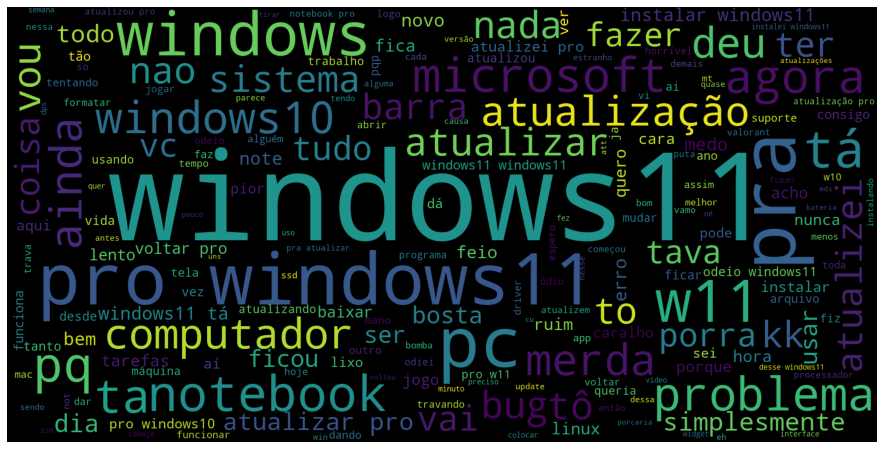

In [15]:
fig, ax = plt.subplots(figsize=(16,8))

ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file('nuvem.png')

In [25]:
def retirar_termos_busca(texto_retirar):
  texto_retirar     = re.sub(r"pra |pro |pc|tá", " ", texto_retirar)
  return texto_retirar



In [26]:
nova_string = retirar_termos_busca(uma_string)

In [27]:
#teste
nova_string = retirar_termos_busca(teste)

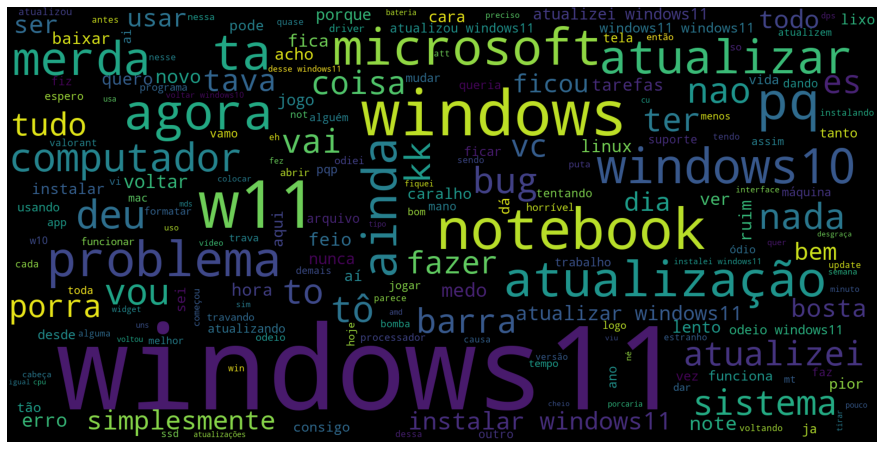

In [28]:
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=1600,
                      height=800).generate(nova_string)

fig, ax = plt.subplots(figsize=(16,8))

ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file('nuvem.png')

In [29]:
nova_string

' vale atenção uma atualização falsa para windows11 é isca para instalação do redline stealer malware que rouba dados pessoais financeiros dos  s das vítimas campanha maliciosa envolvia uso de um site fraudulento que copiava aparência do windows  windows11 es  uma merda depois que atualizei  windows11 nunca mais tive paz no me acostumbro windows11   mas nos códigos do windows quando eu ajudei criar tem lá suporte    antigos sem restrições já windows11 tem códigos que vi que não aceita   antigo mas como eu sou fodinha kk peguei bloco de notas comecei escrever códigos fiz em bat editei uns 2 foi kk windows11 conseguiu ser pior que 10  estou sendo apavorado pelo windows11 vaitomanocu meu not atualizou windows11 sem eu mandar windows11 és uma merda esse windows11 é uma porcaria tenho tirar isso esse windows11 é uma bomba meu deus que desgraça bugada do crlh  microsoft ta de cool doce com esta merda de windows11 viu querendo dar uma de apple com seus aparelhos de 30k   logan paul tô esperan

In [15]:
tweet = df.columns.values[2]
sentiment = df.columns.values[1]
tweet, sentiment

('texto_processado', 'sentimento')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3928 entries, 0 to 3927
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   text                         3928 non-null   object
 1   sentimento                   3928 non-null   object
 2   texto_processado             3928 non-null   object
 3   texto_processado_tokenizado  3928 non-null   object
 4   texto_sem_stopwords          3928 non-null   object
dtypes: object(5)
memory usage: 184.1+ KB


In [19]:
df['sentimento'].count()

3928

In [23]:
sentimento_freq = df['sentimento'].value_counts()

d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
df


fig = plt.figure(figsize =(10, 7)) 
plt.bar(sentimento_freq) 
plt.show() 

TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 720x504 with 0 Axes>

In [25]:
S_table = ({'F' : sentimento_freq})
S_table = pd.DataFrame(S_table)
S_table

,F
Neutro,1703
Negativo,1426
Positivo,799


In [24]:
sentimento_freq

Neutro      1703
Negativo    1426
Positivo     799
Name: sentimento, dtype: int64